In [35]:
import pandas as pd
import json
import requests
import datetime
from pprint import pprint
from config import census_api_key
from census import Census
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
c = Census(
    census_api_key,
    year = 2021
)

In [4]:
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B23025_005E",
        "B23025_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

# Convert to DataFrame
census_df = pd.DataFrame(census_data)

# Column renaming
census_df = census_df.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B23025_005E": 'Unemployed',
        "B23025_002E": 'Employed',
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_df["Poverty Rate"] = 100 * census_df["Poverty Count"].astype(int) / census_df["Population"].astype(int)

# Configure the final DataFrame
census_df = census_df[
    [
        "Zipcode",
        "Population",
        "Median Age",
        'Unemployed',
        'Employed',
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate",
        
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_df)}")
census_df.head()

Number of rows in the DataFrame: 33774


,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,00601,17126.0,43.7,1396.0,5566.0,15292.0,7587.0,11302.0,65.993227
1,00602,37895.0,44.4,939.0,12218.0,18716.0,10699.0,17121.0,45.180103
2,00603,49136.0,44.1,2712.0,15859.0,16789.0,12280.0,23617.0,48.064556
3,00606,5751.0,44.9,113.0,1633.0,18835.0,8574.0,3139.0,54.581812
4,00610,26153.0,43.5,855.0,9464.0,21239.0,11638.0,11640.0,44.507322


In [5]:
poverty_df = census_df.sort_values(by='Poverty Count', ascending=False)
poverty_df.head()

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
2664,10456,90314.0,32.5,5674.0,38725.0,31166.0,17312.0,33294.0,36.864716
2495,08701,130352.0,18.4,2580.0,38655.0,53380.0,18966.0,32214.0,24.713085
2863,11219,93119.0,26.2,2807.0,35169.0,44450.0,17729.0,31973.0,34.335635
58,00725,79153.0,43.7,4302.0,31935.0,24262.0,15654.0,31858.0,40.248632
2850,11206,90903.0,29.7,3649.0,42911.0,49013.0,27672.0,31273.0,34.402605


In [6]:
desired_zip_codes = ['44145', '75206', '55792', '98101', '44312', '79735']

filtered_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

filtered_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
26475,75206,38209.0,31.1,847.0,27249.0,79468.0,64270.0,4485.0,11.738072
14596,44312,30769.0,45.2,1169.0,16791.0,57217.0,31963.0,2847.0,9.252819
28264,79735,13267.0,36.4,75.0,5220.0,54051.0,25082.0,2599.0,19.589960
19117,55792,9907.0,44.3,280.0,4381.0,47102.0,29338.0,2125.0,21.449480
32979,98101,14528.0,35.1,303.0,10774.0,96893.0,91425.0,1799.0,12.382985
14538,44145,34049.0,46.3,737.0,17895.0,98285.0,58539.0,1638.0,4.810714


In [7]:
desired_zip_codes = ['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108', '98109', '98110', '98111', '98112', '98113', '98114', '98115', '98116', '98117', '98118', '98119', '98121', '98122', '98124', '98125', '98126', '98127', '98129', '98131', '98133','98136', '98138', '98139', '98141', '98144', '98145', '98146', '98148', '98155', '98160', '98161', '98165', '98166', '98168', '98170', '98175', '98177', '98178', '98181', '98185', '98188', '98190', '98191', '98194', '98198', '98199']

seattle_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

seattle_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
32983,98105,49448.0,24.1,1552.0,27436.0,73343.0,53246.0,10083.0,20.391118
32993,98118,48937.0,38.4,1266.0,28755.0,94790.0,48632.0,6188.0,12.644829
32996,98122,41541.0,30.9,1973.0,29716.0,87418.0,71064.0,5868.0,14.125803
32999,98133,50153.0,40.2,1184.0,29336.0,77602.0,47266.0,5188.0,10.344346
32997,98125,43386.0,37.6,1121.0,26558.0,82439.0,51315.0,4522.0,10.422717
33016,98198,38919.0,37.0,1587.0,19803.0,69833.0,36630.0,4501.0,11.565045
32986,98108,23759.0,37.1,714.0,13391.0,74985.0,39950.0,4471.0,18.818132
33010,98168,34614.0,37.6,1533.0,19285.0,71977.0,32867.0,4116.0,11.891142
32990,98115,53729.0,37.1,1292.0,33862.0,128443.0,72682.0,3874.0,7.210259
32984,98106,27489.0,35.4,585.0,16557.0,84506.0,45215.0,3673.0,13.361708


In [8]:
seattle_df = seattle_df.dropna()

In [9]:
seattle_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,30318.333333,37.381818,870.030303,18731.060606,102513.090909,63975.121212,2966.151515,9.686978
std,11474.827057,4.428632,410.814168,7393.368984,25487.077011,19797.188553,1934.687412,4.380641
min,11068.000000,24.100000,303.000000,6472.000000,60955.000000,32867.000000,641.000000,2.610254
25%,22890.000000,35.100000,585.000000,13391.000000,82439.000000,47266.000000,1637.000000,6.273473
50%,27190.000000,37.600000,802.000000,16870.000000,97368.000000,66670.000000,2372.000000,9.588920
75%,36365.000000,39.400000,1140.000000,21853.000000,124795.000000,78542.000000,3874.000000,11.891142
max,53729.000000,49.200000,1973.000000,36694.000000,148878.000000,102595.000000,10083.000000,20.391118


In [10]:
desired_zip_codes = ["75001", "75006", "75007", "75019", "75032", "75039", "75041", "75042", "75043", "75050", "75051", "75052", "75061",
          "75062", "75063", "75080", "75081", "75087", "75088", "75089", "75093", "75098", "75104", "75115", "75116", "75126",
          "75134", "75149", "75150", "75159", "75166", "75180", "75181", "75182", "75201", "75202", "75203", "75204", "75205",
          "75206", "75207", "75208", "75209", "75210", "75211", "75212", "75214", "75215", "75216", "75217", "75218", "75219",
          "75220", "75221", "75222", "75223", "75224", "75225", "75226", "75227", "75228", "75229", "75230", "75231", "75232",
          "75233", "75234", "75235", "75236", "75237", "75238", "75240", "75241", "75242", "75243", "75244", "75246", "75247",
          "75248", "75249", "75250", "75251", "75252", "75253", "75254", "75260", "75261", "75262", "75263", "75264", "75265",
          "75266", "75267", "75270", "75275", "75277", "75283", "75284", "75285", "75287", "75301", "75303", "75312", "75313",
          "75315", "75320", "75326", "75336", "75339", "75342", "75354", "75355", "75356", "75357", "75358", "75359", "75360",
          "75367", "75368", "75370", "75371", "75372", "75373", "75374", "75376", "75378", "75379", "75380", "75381", "75382",
          "75389", "75390", "75391", "75392", "75393", "75394", "75395", "75397", "75398"]

dallas_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

dallas_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
26485,75217,87767.0,27.6,1149.0,34612.0,44384.0,15227.0,23667.0,26.965716
26484,75216,55108.0,33.2,1646.0,20627.0,31063.0,16151.0,17532.0,31.813893
26480,75211,75213.0,30.9,2221.0,36527.0,50368.0,19843.0,14837.0,19.726643
26507,75243,65118.0,33.8,2226.0,35729.0,43673.0,27970.0,14069.0,21.605393
26494,75228,71450.0,30.7,1855.0,34329.0,51018.0,23418.0,13823.0,19.346396
...,...,...,...,...,...,...,...,...,...
26513,75251,3804.0,30.7,33.0,2905.0,78245.0,50352.0,169.0,4.442692
26461,75166,5589.0,35.0,59.0,3319.0,105972.0,40261.0,122.0,2.182859
26517,75261,0.0,-666666666.0,0.0,0.0,-666666666.0,-666666666.0,0.0,NaN
26518,75270,0.0,-666666666.0,0.0,0.0,-666666666.0,-666666666.0,0.0,NaN


In [11]:
dallas_df = dallas_df.dropna()

In [12]:
dallas_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,33930.536585,34.721951,895.926829,18207.463415,73419.024390,40541.341463,4477.170732,13.876770
std,20033.706346,4.785963,589.453121,10423.196441,29507.249283,23118.815731,4084.803970,10.254064
min,870.000000,25.600000,6.000000,245.000000,17361.000000,9645.000000,122.000000,2.182859
25%,19116.750000,31.800000,471.250000,9699.250000,50530.500000,23434.750000,1610.750000,6.951790
50%,31804.500000,33.800000,800.000000,16966.500000,68180.500000,34171.000000,3491.500000,11.456524
75%,46232.000000,37.100000,1191.000000,25307.500000,95805.250000,50137.250000,6170.750000,19.530116
max,95745.000000,56.500000,2703.000000,51564.000000,169547.000000,120241.000000,23667.000000,72.873563


In [13]:
desired_zip_codes = ["94101", "94102", "94103", "94104", "94105", "94107", "94108", "94109", "94110", "94111", "94112", "94114",
                 "94115", "94116", "94117", "94118", "94119", "94120", "94121", "94122", "94123", "94124", "94125", "94126",
                 "94127", "94129", "94130", "94131", "94132", "94133", "94134", "94140", "94141", "94142", "94146", "94147",
                 "94157", "94159", "94164", "94165", "94166", "94167", "94168", "94169", "94170", "94172", "94188"]

sanfransisco_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

sanfransisco_df = sanfransisco_df.dropna()

sanfransisco_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
31601,94112,84477.0,42.5,2853.0,48306.0,112795.0,43658.0,7560.0,8.949181
31599,94110,70859.0,38.3,2409.0,47029.0,143938.0,79561.0,6939.0,9.792687
31598,94109,56114.0,37.2,2322.0,39355.0,104476.0,91684.0,6850.0,12.207292
31610,94124,35982.0,37.7,1638.0,17887.0,66618.0,33172.0,6440.0,17.897838
31592,94102,33856.0,39.6,1541.0,20679.0,55888.0,60673.0,6092.0,17.993856
31593,94103,32430.0,36.4,1215.0,22033.0,93143.0,73194.0,5202.0,16.040703
31608,94122,60144.0,41.0,1976.0,36305.0,130708.0,64313.0,5001.0,8.315044
31618,94134,41977.0,43.0,1402.0,23272.0,93068.0,41443.0,4747.0,11.308574
31607,94121,43964.0,41.6,1384.0,25418.0,116970.0,71120.0,4224.0,9.607861
31603,94115,34193.0,36.7,811.0,21835.0,138023.0,100897.0,4195.0,12.268593


In [14]:
sanfransisco_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,32895.192308,39.165385,1092.730769,20537.807692,128804.461538,79984.846154,3336.576923,12.036861
std,20519.889423,5.119917,739.801247,12757.545106,51976.355537,32457.030683,2225.385615,7.910814
min,504.000000,27.800000,71.000000,279.000000,42591.000000,30518.000000,112.000000,3.357942
25%,22195.750000,36.425000,512.250000,12281.500000,93086.750000,59927.500000,1543.750000,6.367984
50%,33143.000000,38.950000,1068.000000,20686.000000,132680.000000,75041.000000,2786.000000,10.550630
75%,41846.750000,42.325000,1404.250000,25356.250000,168166.500000,96966.500000,4937.500000,15.679435
max,84477.000000,51.500000,2853.000000,48306.000000,244662.000000,172211.000000,7560.000000,41.098901


In [15]:
desired_zip_codes = ["44102", "44103", "44104", "44105", "44106", "44107", "44108", "44109", "44110", "44111", "44112", "44113",
             "44114", "44115", "44117", "44118", "44119", "44120", "44121", "44124", "44125", "44126", "44127", "44128", "44129",
             "44130", "44134", "44135", "44137", "44142", "44143", "44144", "44181", "44188", "44190", "44191", "44192" ,"44193",
             "44194", "44195", "44197", "44198", "44199"]

cleveland_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

cleveland_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
14495,44102,42640.0,34.4,2211.0,20900.0,33188.0,24289.0,13713.0,32.159944
14498,44105,34339.0,39.4,2666.0,15637.0,31690.0,18734.0,11179.0,32.554821
14502,44109,39502.0,35.9,2296.0,20075.0,36777.0,21757.0,10210.0,25.846793
14497,44104,18830.0,31.9,1658.0,7193.0,18591.0,14485.0,9696.0,51.492300
14504,44111,42366.0,36.5,1953.0,22483.0,47076.0,26320.0,9178.0,21.663598
14513,44120,34629.0,41.1,1459.0,16623.0,40563.0,34366.0,7623.0,22.013341
14501,44108,21711.0,36.7,1536.0,8930.0,29763.0,22281.0,7228.0,33.291880
14528,44135,26836.0,39.2,1476.0,13759.0,41622.0,25742.0,7175.0,26.736473
14503,44110,18449.0,40.8,977.0,7825.0,24994.0,17661.0,7033.0,38.121307
14499,44106,24824.0,31.3,979.0,10842.0,32745.0,33352.0,6654.0,26.804705


In [16]:
cleveland_df = cleveland_df.dropna()

cleveland_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
14495,44102,42640.0,34.4,2211.0,20900.0,33188.0,24289.0,13713.0,32.159944
14498,44105,34339.0,39.4,2666.0,15637.0,31690.0,18734.0,11179.0,32.554821
14502,44109,39502.0,35.9,2296.0,20075.0,36777.0,21757.0,10210.0,25.846793
14497,44104,18830.0,31.9,1658.0,7193.0,18591.0,14485.0,9696.0,51.492300
14504,44111,42366.0,36.5,1953.0,22483.0,47076.0,26320.0,9178.0,21.663598
14513,44120,34629.0,41.1,1459.0,16623.0,40563.0,34366.0,7623.0,22.013341
14501,44108,21711.0,36.7,1536.0,8930.0,29763.0,22281.0,7228.0,33.291880
14528,44135,26836.0,39.2,1476.0,13759.0,41622.0,25742.0,7175.0,26.736473
14503,44110,18449.0,40.8,977.0,7825.0,24994.0,17661.0,7033.0,38.121307
14499,44106,24824.0,31.3,979.0,10842.0,32745.0,33352.0,6654.0,26.804705


In [17]:
cleveland_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,26474.468750,38.556250,1213.281250,13596.062500,45011.406250,28787.468750,5517.500000,23.544112
std,12458.705825,5.024645,590.974877,7240.978137,15940.452592,9534.767027,3038.802067,12.717518
min,4573.000000,27.100000,269.000000,1891.000000,18591.000000,14485.000000,1586.000000,5.998611
25%,18556.250000,34.550000,869.500000,8025.250000,32481.250000,22150.000000,2948.000000,14.144119
50%,24617.500000,39.700000,1108.000000,12356.000000,43374.000000,26967.000000,5489.000000,22.288190
75%,35379.500000,41.100000,1563.500000,18284.000000,59013.500000,33129.250000,7068.500000,32.258663
max,51451.000000,51.000000,2666.000000,32621.000000,70740.000000,50953.000000,13713.000000,58.270089


In [18]:
desired_zip_codes = ["59801", "59802", "59803", "59804", "59806", "59807", "59808"]

missoula_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

missoula_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
20739,59801,30886.0,31.2,1172.0,20220.0,46112.0,32774.0,6287.0,20.355501
20740,59802,19790.0,35.5,695.0,12363.0,54450.0,33573.0,3263.0,16.488125
20743,59808,21669.0,37.6,513.0,12896.0,65567.0,39738.0,2363.0,10.904979
20741,59803,17052.0,39.6,341.0,9334.0,89946.0,45958.0,734.0,4.304480
20742,59804,7802.0,44.4,139.0,4083.0,75556.0,38872.0,317.0,4.063061


In [19]:
missoula_df = missoula_df.dropna()

In [20]:
missoula_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,19439.800000,37.660000,572.000000,11779.200000,66326.200000,38183.000000,2592.800000,11.223229
std,8325.374538,4.888558,393.528906,5874.641836,17272.221577,5335.090252,2386.602858,7.251826
min,7802.000000,31.200000,139.000000,4083.000000,46112.000000,32774.000000,317.000000,4.063061
25%,17052.000000,35.500000,341.000000,9334.000000,54450.000000,33573.000000,734.000000,4.304480
50%,19790.000000,37.600000,513.000000,12363.000000,65567.000000,38872.000000,2363.000000,10.904979
75%,21669.000000,39.600000,695.000000,12896.000000,75556.000000,39738.000000,3263.000000,16.488125
max,30886.000000,44.400000,1172.000000,20220.000000,89946.000000,45958.000000,6287.000000,20.355501


In [21]:
desired_zip_codes = ['55792']

virginia_minnesota_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

virginia_minnesota_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
19117,55792,9907.0,44.3,280.0,4381.0,47102.0,29338.0,2125.0,21.44948


In [22]:
desired_zip_codes = ["46107", "46183", "46201", "46202", "46203", "46204", "46205", "46206", "46207", "46208", "46214", "46214", "46216",
      "46217", "46217", "46218", "46219", "46220", "46221", "46222", "46224", "46224", "46225", "46226", "46226", "46227",
      "46227", "46228", "46229", "46229", "46230", "46231", "46231", "46234", "46234", "46235", "46235", "46236", "46236",
      "46237", "46237", "46239", "46239", "46240", "46240", "46241", "46241", "46242", "46244", "46247", "46247", "46250",
      "46250", "46251", "46253", "46253" ,"46254", "46254", "46256", "46256", "46259", "46259", "46260", "46260", "46268",
      "46268", "46278", "46278", "46282"]

indianapolis_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

indianapolis_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
15374,46226,44764.0,33.8,2193.0,21794.0,37798.0,22464.0,11351.0,25.357430
15371,46222,38053.0,30.1,1564.0,17106.0,41502.0,17232.0,9703.0,25.498647
15375,46227,57359.0,33.6,1065.0,28934.0,47541.0,26974.0,8995.0,15.681933
15357,46201,31193.0,34.4,1741.0,15420.0,34790.0,22251.0,8795.0,28.195428
15359,46203,38829.0,35.0,1147.0,19262.0,44356.0,27025.0,8615.0,22.187025
15367,46218,29254.0,38.7,1420.0,12142.0,28758.0,18667.0,8567.0,29.284884
15385,46241,33756.0,30.5,1147.0,14576.0,44543.0,19696.0,8137.0,24.105344
15372,46224,39490.0,32.0,1135.0,20491.0,45668.0,23081.0,8117.0,20.554571
15387,46254,40540.0,31.6,1478.0,21218.0,51702.0,28157.0,7136.0,17.602368
15380,46235,33715.0,29.2,1067.0,17112.0,48699.0,22171.0,6832.0,20.263977


In [23]:
indianapolis_df = indianapolis_df.dropna()

In [24]:
indianapolis_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000
mean,27261.694444,35.316667,784.055556,14213.361111,61214.194444,34314.083333,4194.00000,14.515307
std,12278.847037,3.466781,505.045964,6185.386590,22622.702242,11230.017528,3168.86662,7.992910
min,2206.000000,29.200000,53.000000,1261.000000,28758.000000,17232.000000,185.00000,3.109328
25%,19122.250000,32.850000,373.000000,11148.750000,46485.500000,26844.500000,1656.25000,7.775379
50%,28031.000000,35.400000,689.000000,14571.500000,55556.000000,31895.500000,3078.50000,13.382864
75%,37083.250000,37.325000,1084.000000,19049.500000,75289.250000,44033.750000,6908.00000,20.731057
max,57359.000000,45.000000,2193.000000,28934.000000,135602.000000,57479.000000,11351.00000,32.239344


In [25]:
indianapolis_clean_df = indianapolis_df[["Population","Poverty Rate",]].agg(["mean","std"])
indianapolis_PR_df = indianapolis_df[["Population","Poverty Rate",]].agg(["mean"])
indianapolis_clean_df["City"] ="indianapolis"

indianapolis_PR_df = indianapolis_df[["Population","Poverty Rate"]].agg(["mean"])
indianapolis_PR_df["City"] ="indianapolis"

indianapolis_sum_df = indianapolis_df[["Population"]].agg(["sum"])
indianapolis_sum_df["City"] ="indianapolis"


indianapolis_sum_df

,Population,City
sum,981421.0,indianapolis


In [26]:
missoula_clean_df = missoula_df[["Population","Poverty Rate"]].agg(["mean","std"])
missoula_clean_df["City"] ="missoula"

missoula_PR_df = missoula_df[["Population","Poverty Rate"]].agg(["mean"])
missoula_PR_df["City"] ="missoula"

missoula_sum_df = missoula_df[["Population"]].agg(["sum"])
missoula_sum_df["City"] ="missoula"

missoula_clean_df

,Population,Poverty Rate,City
mean,19439.800000,11.223229,missoula
std,8325.374538,7.251826,missoula


In [27]:
cleveland_clean_df = cleveland_df[["Population","Poverty Rate"]].agg(["mean","std"])
cleveland_clean_df["City"] ="cleveland"

cleveland_PR_df = cleveland_df[["Population","Poverty Rate"]].agg(["mean"])
cleveland_PR_df["City"] ="cleveland"

cleveland_sum_df = cleveland_df[["Population"]].agg(["sum"])
cleveland_sum_df["City"] ="cleveland"

cleveland_clean_df

,Population,Poverty Rate,City
mean,26474.468750,23.544112,cleveland
std,12458.705825,12.717518,cleveland


In [28]:
sanfransisco_clean_df = sanfransisco_df[["Population","Poverty Rate"]].agg(["mean","std"])
sanfransisco_clean_df["City"] ="san fransisco"

sanfransisco_PR_df = sanfransisco_df[["Population","Poverty Rate"]].agg(["mean"])
sanfransisco_PR_df["City"] ="san fransisco"

sanfransisco_sum_df = sanfransisco_df[["Population"]].agg(["sum"])
sanfransisco_sum_df["City"] ="san fransisco"

sanfransisco_clean_df

,Population,Poverty Rate,City
mean,32895.192308,12.036861,san fransisco
std,20519.889423,7.910814,san fransisco


In [29]:
dallas_clean_df = dallas_df[["Population","Poverty Rate"]].agg(["mean","std"])
dallas_clean_df["City"] ="dallas"

dallas_PR_df = dallas_df[["Population","Poverty Rate"]].agg(["mean"])
dallas_PR_df["City"] ="dallas"

dallas_sum_df = dallas_df[["Population"]].agg(["sum"])
dallas_sum_df["City"] ="dallas"

dallas_clean_df

,Population,Poverty Rate,City
mean,33930.536585,13.876770,dallas
std,20033.706346,10.254064,dallas


In [30]:
seattle_clean_df = seattle_df[["Population","Poverty Rate"]].agg(["mean","std"])
seattle_clean_df["City"] ="seattle"

seattle_PR_df = seattle_df[["Population","Poverty Rate"]].agg(["mean"])
seattle_PR_df["City"] ="seattle"

seattle_sum_df = seattle_df[["Population"]].agg(["sum"])
seattle_sum_df["City"] ="seattle"


seattle_clean_df

,Population,Poverty Rate,City
mean,30318.333333,9.686978,seattle
std,11474.827057,4.380641,seattle


In [31]:
virginia_minnesota_clean_df = virginia_minnesota_df[["Poverty Rate","Population"]].agg(["mean"])
virginia_minnesota_clean_df["City"] = "virgina (minnesota)"

virginia_minnesota_PR_df = virginia_minnesota_df[["Poverty Rate","Population"]].agg(["mean"])
virginia_minnesota_PR_df["City"] = "virgina (minnesota)"

virginia_minnesota_sum_df = virginia_minnesota_df[["Population"]].agg(["mean"])
virginia_minnesota_sum_df["City"] = "virgina (minnesota)"


first_column = virginia_minnesota_clean_df.pop("Population") 
virginia_minnesota_clean_df.insert(0, "Population", first_column)

virginia_minnesota_PR_df

,Poverty Rate,Population,City
mean,21.44948,9907.0,virgina (minnesota)


In [32]:
Complete_pov_df = [indianapolis_clean_df,missoula_clean_df,cleveland_clean_df,dallas_clean_df,
                   seattle_clean_df,virginia_minnesota_clean_df]
result = pd.concat(Complete_pov_df)

f_column = result.pop("City") 
result.insert(0, "City", f_column)
result

,City,Population,Poverty Rate
mean,indianapolis,27261.694444,14.515307
std,indianapolis,12278.847037,7.992910
mean,missoula,19439.800000,11.223229
std,missoula,8325.374538,7.251826
mean,cleveland,26474.468750,23.544112
std,cleveland,12458.705825,12.717518
mean,dallas,33930.536585,13.876770
std,dallas,20033.706346,10.254064
mean,seattle,30318.333333,9.686978
std,seattle,11474.827057,4.380641


In [44]:
Complete_PR_df = pd.concat([cleveland_PR_df,dallas_PR_df,indianapolis_PR_df,missoula_PR_df,
                   seattle_PR_df,virginia_minnesota_PR_df])
Complete_rounded_PR_df = Complete_PR_df.round(2)
Complete_rounded_PR_df

,Population,Poverty Rate,City
mean,26474.47,23.54,cleveland
mean,33930.54,13.88,dallas
mean,27261.69,14.52,indianapolis
mean,19439.80,11.22,missoula
mean,30318.33,9.69,seattle
mean,9907.00,21.45,virgina (minnesota)


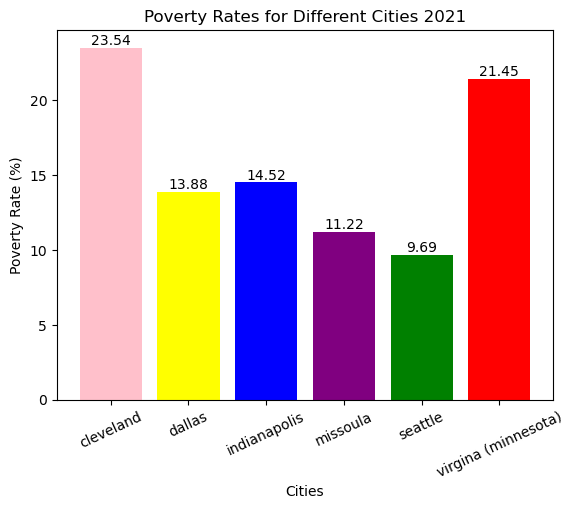

In [53]:
city=list(Complete_rounded_PR_df["City"].values[0:])
povrate=list(Complete_rounded_PR_df["Poverty Rate"].values[0:])

bar_colors = ["Pink", "yellow", "blue", "purple","green","red"]
plt.ylabel("Poverty Rate (%)")
plt.xlabel("Cities")
plt.title("Poverty Rates for Different Cities 2021")
bar1=plt.bar(city,povrate,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar1,labels=povrate,label_type="edge")
plt.show()

In [46]:
Complete_sum_df = pd.concat([cleveland_sum_df,dallas_sum_df,indianapolis_sum_df,missoula_sum_df,
                   seattle_sum_df,virginia_minnesota_sum_df])

Complete_rounded_sum_df = Complete_sum_df.round(2)

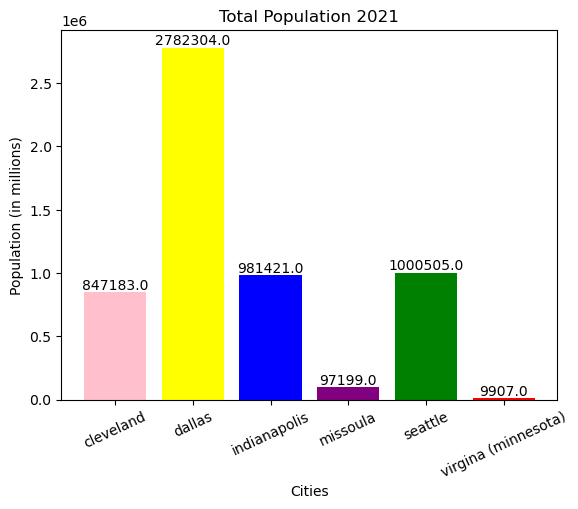

In [54]:
pop=list(Complete_sum_df["Population"].values[0:])

bar_colors = ["Pink", "yellow", "blue", "purple","green","red"]
plt.ylabel("Population (in millions)")
plt.xlabel("Cities")
plt.title("Total Population 2021")
bar2=plt.bar(city,pop,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar2,labels=pop,label_type="edge")
plt.show()

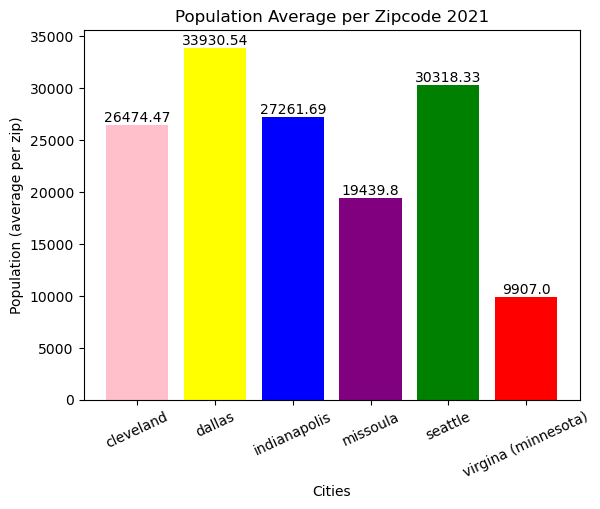

In [55]:
pop_ave=list(Complete_rounded_PR_df["Population"].values[0:])


bar_colors = ["Pink", "yellow", "blue", "purple","green","red"]
plt.ylabel("Population (average per zip)")
plt.xlabel("Cities")
plt.title("Population Average per Zipcode 2021")
bar3=plt.bar(city,pop_ave,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar3,labels=pop_ave,label_type="edge")
plt.show()